<h1> Natural Language Processing with Python's NLTK package. </h1>
Aayush Bhurtel
MSAI-532 NLP

In [1]:
#pip install nltk numpy matplotlib

Install necessary NLTK, Numpy and MatPlotLib packages.

In [2]:
import nltk
#nltk.download('all')
from nltk.tokenize import sent_tokenize, word_tokenize

after installing nltk package, we need to install necessary dataset or models for out purposes. Here, i have downloaded all cause I am not sure what is needed. In other case, we can kust download "popular or specific ones.
Also, import relevent parts of NLTK for tonizing, sent_tokenize and word_tokenize.

In [3]:
example_string = """Muad'Dib learned rapidly because his first training was in how to learn. And the first lesson of all was the basic trust that he could learn. It's shocking to find how many people do not believe they can learn, and how many more believe learning to be difficult."""

creating a string from a quote of DUNE.

In [4]:
sent_tokenize(example_string)

["Muad'Dib learned rapidly because his first training was in how to learn.",
 'And the first lesson of all was the basic trust that he could learn.',
 "It's shocking to find how many people do not believe they can learn, and how many more believe learning to be difficult."]

we used sent_tokenize() to split the example_string into sentences. It gave us 3 sentences as above.

In [5]:
word_tokenize(example_string)

["Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn',
 '.',
 'And',
 'the',
 'first',
 'lesson',
 'of',
 'all',
 'was',
 'the',
 'basic',
 'trust',
 'that',
 'he',
 'could',
 'learn',
 '.',
 'It',
 "'s",
 'shocking',
 'to',
 'find',
 'how',
 'many',
 'people',
 'do',
 'not',
 'believe',
 'they',
 'can',
 'learn',
 ',',
 'and',
 'how',
 'many',
 'more',
 'believe',
 'learning',
 'to',
 'be',
 'difficult',
 '.']

Now we tried word_tokenize(), here we got a list of string where NTLK considered words are seperated. punchuation and aposthrophe letters are also considered words by NTLK. It's is considered two separate word by NLTK, it and is. 
Our next job is to Filter stop words.

<h1> Filter Stop Words </h1> <br>
Stop words are those words you want to ignore while processing. very common words like 'is', 'in', 'an' are used as stop word. <br>
First, lets import stopword.

In [6]:
from nltk.corpus import stopwords

now lets create a worf string.

In [7]:
worf_quote = "Sir, I protest. I am not a merry man!"

next, tokenize worf_quote by word and store the sult in words_in_quote:

In [8]:
words_in_quote = word_tokenize(worf_quote)
words_in_quote

['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

here we have a list of words in a list. next step is to create a set of stop words to filter words_in_quote. <br>
in this example we will focus on stop word in 'english'

In [9]:
stop_words = set(stopwords.words('english'))

next, we will create an empty list to hold words that makes past the filters.

In [10]:
filtered_list = []

Now, we can use stop_words to filter words_in_quote:

In [11]:
for word in words_in_quote:
    if word.casefold() not in stop_words:
        filtered_list.append(word)

filtered_list

['Sir', ',', 'protest', '.', 'merry', 'man', '!']

we iterated over words_in_quote with a for loop, added all the words that aren't stop words to filtered_list. <br>
we used casefold() class to ignore the case of a words because stopwords.words('english') only includes lowercase.

<h1> Stemming </h1><br>
Stemming is a text processing task in which you reduce words to their root, which is core part of a word. For example, the words "helping" and "helper" share the root "help." NLTK has many stemmer but we are going to use the <b>Porter Stemmer</b>.

In [12]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

Next, Create a String to stem as follows

In [13]:
string_for_stemming = "The crew of the USS Discovery discovered many discoveries. Discovering is what explorers do."

Before stemming, we need to separate words using word tokonizer.

In [14]:
words = word_tokenize(string_for_stemming)
words

['The',
 'crew',
 'of',
 'the',
 'USS',
 'Discovery',
 'discovered',
 'many',
 'discoveries',
 '.',
 'Discovering',
 'is',
 'what',
 'explorers',
 'do',
 '.']

Now lets create a list of stemmed version of the words in words by using stemmer.stem().

In [15]:
stemmed_words = [stemmer.stem(word) for word in words]  
stemmed_words

['the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

when we look at the result, word 'discovery' gave us "disvoveri" whereas, 'Discovering' gives us "discov".
Porter Stemming algorithm dates from 1979 so its old. we have porter2 and more advanced ways to reducce words such as lemmatizing. we will look at this later. <br>
<h1> Tagging Parts of Speech </h1> <br>

part of speech is a grammatical term which comes into play when you use words play together in a sentences. <b>POS tagging</b> or tagging part of speech is the task of labeling the words in your text according to their part of speech. <br>
In English, there are 8 parts of speech <br>
| Part of Speech  | Role                                             | Examples                      |
|----------------|-------------------------------------------------|--------------------------------|
| Noun          | Is a person, place, or thing                     | mountain, bagel, Poland       |
| Pronoun       | Replaces a noun                                  | you, she, we                 |
| Adjective     | Gives information about what a noun is like      | efficient, windy, colorful    |
| Verb         | Is an action or a state of being                 | learn, is, go                |
| Adverb        | Gives information about a verb, an adjective, or another adverb | efficiently, always, very |
| Preposition   | Gives information about how a noun or pronoun is connected to another word | from, about, at |
| Conjunction   | Connects two other words or phrases             | so, because, and              |
| Interjection  | Is an exclamation                               | yay, ow, wow                 | 

<br>
NLTK uses the word <b> determiner </b> to refer to articles.


In [16]:
sagan_quote = "if you wish to make an apple pie from scratch, you must first invent the universe."

we use word_tokernizer() to separate words in the string and store them in a list.

In [17]:
from nltk.tokenize import word_tokenize
words_in_sagan_quote = word_tokenize(sagan_quote)

now call nltk.pos_tag() on new list of words,

In [18]:
nltk.pos_tag(words_in_sagan_quote)

[('if', 'IN'),
 ('you', 'PRP'),
 ('wish', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('apple', 'NN'),
 ('pie', 'NN'),
 ('from', 'IN'),
 ('scratch', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('first', 'VB'),
 ('invent', 'VB'),
 ('the', 'DT'),
 ('universe', 'NN'),
 ('.', '.')]

All the words are separated and in a tuple, and there is a tag to determine part of speech. lets get the full tag using upenn_tagset()

In [19]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

list is long but basically, JJ is adjective, NN is nouns, RB is adverb, PRP is pronouns and VB is verbs. now look at the words and the tag to see if they match or not. 'pie' was tagged noun, 'you' was pronoun and 'invent' was verb, fairly accurate. kudos! <br>
now lets look at how NLTK handles tagging that is gibberish. <b>Jabberwocky</b> poem and try pos tagging here.

In [20]:
jabberwocky = """'Twas brillig, and the slithy toves
Did gyre and gimble in the wabe: all mimsy were the borogoves,
And the mome raths outgrabe."""

words_in_jabberwocky = word_tokenize(jabberwocky)
nltk.pos_tag(words_in_jabberwocky)

[("'T", 'NN'),
 ('was', 'VBD'),
 ('brillig', 'VBN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('slithy', 'JJ'),
 ('toves', 'NNS'),
 ('Did', 'NNP'),
 ('gyre', 'NN'),
 ('and', 'CC'),
 ('gimble', 'JJ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('wabe', 'NN'),
 (':', ':'),
 ('all', 'DT'),
 ('mimsy', 'NNS'),
 ('were', 'VBD'),
 ('the', 'DT'),
 ('borogoves', 'NNS'),
 (',', ','),
 ('And', 'CC'),
 ('the', 'DT'),
 ('mome', 'JJ'),
 ('raths', 'NNS'),
 ('outgrabe', 'RB'),
 ('.', '.')]

farily correct, 'and' and 'the' were tagged conjuction. 'silthy' was tagged adjective which is what a human would assume. Kudos to NLTK.

<h1> Lemmatizing </h1> <br>
Lemmatizing reduces words to their core meaning, but it will give a full words that makes sense rather then just word 'discoveri' above. 
<br><br>

> **Note:** A lemma is a word that represents a whole group of words, and that group of words is called a lexeme.  
>  
> For example, if you were to look up the word “blending” in a dictionary, then you’d need to look at the entry for “blend,” but you would find “blending” listed in that entry.  
>  
> In this example, “blend” is the lemma, and “blending” is part of the lexeme. So when you lemmatize a word, you are reducing it to its lemma.


In [21]:
# import relevant libraries
from nltk.stem import WordNetLemmatizer

# create lemmatizer to use i.e initialize
lemmatizer = WordNetLemmatizer()

#lets lemmatize some words
print(lemmatizer.lemmatize("scarves"))

scarf


thats quite sophisticated than what stemmer would give you such as scarv. way to go, lets try a string as sentence.


In [22]:
# create a string to lemmatize
string_for_lemmatizing = "The friends of DeSoto love scarves."
# tokenize the string
words = word_tokenize(string_for_lemmatizing)
# create a list to hold the lemmatized words
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
lemmatized_words

['The', 'friend', 'of', 'DeSoto', 'love', 'scarf', '.']

Looks good, friends and scarves became friend and scarf. lets try something different. lets try with word worst.

In [23]:
lemmatizer.lemmatize("worst")

'worst'

this is because lemmatizer assumes worst was a noun. it is cause default parameter for pos is 'n' as noun. lets change that and treat worst as an adjective with 'a'

In [24]:
lemmatizer.lemmatize("worst", pos="a")

'bad'

Bravo, NLTK is good. now lets talk about chunking! <br>
<h1> Chunking </h1> <br>
As tokenization allows us to identity words and sentences, <b>chunking</b> allows us to identify phrases.
<br>
<br>

> **Note:** A phrase is a word or group of words that works as a single unit to perform a grammatical function. Noun phrases are built around a noun.
>
> Here are some examples:
>
> - “A planet”
> - “A tilting planet”
> - “A swiftly tilting planet”
>

<br>
Chunks does not overlap, so one instance of a word can be in only one chunk at a time. And before chunking, make sure the that the part of speech in your text are tagged.



In [25]:
lotr_quote = "It's a dangerous business, Frodo, going out your door."
# tokenize the quote
words_in_lotr_quote = word_tokenize(lotr_quote)
# tag the words
lotr_pos_tags = nltk.pos_tag(words_in_lotr_quote)
lotr_pos_tags

[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

now to chunk, we need to define a chunk grammar.

<br> 

>

> **Note:** A chunk grammar is a combination of rules on how sentences should be chunked. It often uses regular expressions, or regexes.
>
> For this tutorial, you don’t need to know how regular expressions work, but they will definitely come in handy for you in the future if you want to process text.



In [26]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

NP stands for noun phrase. <b> Start with optional (?) determiner ('DT'). Can have any number (*) of adjectives (JJ), Ends with a Noun (<NN>) </b> <br>
Create a chunk parser with this grammar:

In [27]:
chunk_parser = nltk.RegexpParser(grammar)
tree = chunk_parser.parse(lotr_pos_tags)
tree.draw()

![Tree](chunk_parser.png)

<br>

Two noun phrases:<br>
1. 'a dangerous business' has a determiner, an adjective and a noun.
2. 'door' has just a noun.

<h1> Chinking </h1> 
Chinking is used together with chunking with opposite use cases. Chunking is used to include a pattern whereas chinking is ussed to exclude a pattern.
Let's reuse same quote and create a grammar to determine what to include and exclude. This time, you’re going to use more than one line because you’re going to have more than one rule. Because you’re using more than one line for the grammar, you’ll be using triple quotes ("""):

In [28]:
grammar = """
    Chunk: {<.*>+}       # Chunk everything
           }<JJ>{        # Remove adjectives (JJ) from the chunk
"""

First rule of grammar is {<.*>+}. {} means what patterns to include in chunks. in this case, we want to include <b><.*>+</b> <br>

Second rule of grammar is }<JJ>{. }{ means those patterns to exclude in your chunks, which is <b><JJ></b>. <br>
create a chunk parser with this grammar.

In [29]:
chunk_parser = nltk.RegexpParser(grammar)

Now lets chunk our sentence with the chink specified:

In [30]:
tree = chunk_parser.parse(lotr_pos_tags)
tree.draw()

![Chink](chink.png)

In this case, ('dangerous','JJ') was excluded from the chunks.

Now we know how to exclude patterns from chunks, lets look into <b> Named Entity Recognition </b>

<h1> Named Entity Recognition </h1>

Named entities are noun phrases that refer to specific locations, people or organization. Some examples of named entity are Date, Time, Money, Person, Organization, or more.
lets see how to do this.

In [31]:
tree = nltk.ne_chunk(lotr_pos_tags)
tree.draw()

![named_entity](named_entity.png)

lets look at this, here FRODO is tagged as a person. 
THere is also an option to use a parameter of (binary=True) if we want to know what the named entity are but not what kind of named entity they are:

In [32]:
tree = nltk.ne_chunk(lotr_pos_tags, binary=True)
tree.draw()

![named_entity](named_entity_binary.png)

here Frodo is Named entity so NE is only frodo. but we can take this furthur and extact name entity directly from text. Lets create a string to extract a named entity.

In [33]:
quote = "men like schiaparelli watched the red planet-it is odd, by the bye, that for countless centuries Mars has been the star of war-but failed to interpret the fluctuating appearances of the markings they mapped so well. All that time the Martians must have been getting ready. During the opposition of 1894 a great light was seen on the illuminated part of the disk, first at the Lick Observatory, then by Perrotin of Nice, and then by other observers. English readers heard of it first in the issue of Nature dated August 2."

now we create a function to extract the named entity:

In [34]:
def extract_ne(quote):
    words = word_tokenize(quote)
    tags = nltk.pos_tag(words)
    tree = nltk.ne_chunk(tags, binary=True)
    return set(" ".join(i[0] for i in t) for t in tree if hasattr(t, "label") and t.label() == "NE")
extract_ne(quote)

{'Lick Observatory', 'Mars', 'Nature', 'Perrotin'}

with this function, all named entities are listed with no repeats. let break it down, 
1. we tokenize the quote by words.
2. apply part of speech tags to those words
3. then extract named entities based on those tags. 
since we added binary=True, we dont get specific of entities, just named entities.

several entities may have missed like NICE, because nltk interpreted it as a regular english adjective instead of named entity place. <br>
Still some decent work!

<h1> Getting Text to Analyze </h1> </b>
next part is to analyze texts from group. A group of text is called <b> corpus </b>. NLTK provides several corpora including speeches by presidents of the United States.
to do this, we need to download a book from nltk

In [35]:
#nltk.download('book')
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


thats all for now, we will look at this in another notebook.

<h1> Using a Concordance </h1>

when you use a concordance, you can see each time a word is used, along with its immediate context.
lets see what we can get from a text8 corpus by calling concordance() function with "man" parameter.

In [36]:
text8.concordance("man")

Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for 
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially 
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining 
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet time

can you see last 3 matches, honest man, lets check out same stuff with "women" as well.


In [37]:
text8.concordance("woman")

Displaying 11 of 11 matches:
at home . Seeking an honest , caring woman , slim or med . build , who enjoys t
thy man 37 like to meet full figured woman for relationship . 48 slim , shy , S
rry . MALE 58 years old . Is there a Woman who would like to spend 1 weekend a 
 other interests . Seeking Christian Woman for fship , view to rship . SWM 45 D
ALE 60 - burly beared seeks intimate woman for outings n / s s / d F / ston / P
ington . SCORPIO 47 seeks passionate woman for discreet intimate encounters SEX
le dad . 42 , East sub . 5 " 9 seeks woman 30 + for f / ship relationship TALL 
personal trainer looking for married woman age open for fun MARRIED Dark guy 37
rinker , seeking slim - medium build woman who is happy in life , age open . AC
. O . TERTIARY Educated professional woman , seeks professional , employed man 
 real romantic , age 50 - 65 y . o . WOMAN OF SUBSTANCE 56 , 59 kg ., 50 , fit 


"seeking an honest, caring women", there is only 1 match for honest in this concordance. 

Corpus and Concordance won't gives us full picture but it can be intresting to see if there is anything that stands out.

<h1> Making a Dispersion Plot </h1>

we can use a disperson plot to see where and how often a word appears. so far, we took a peek at man and women but it would be interesting to see how these words are compared to their synonyms.

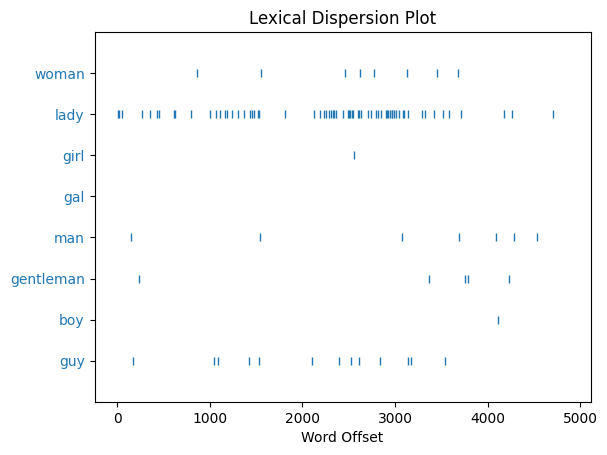

In [38]:
text8.dispersion_plot(["woman", "lady", "girl", "gal", "man", "gentleman", "boy", "guy"])

we can see that lady was used more than 'woman' or 'girl'. Intrestingly no instance of 'gal'.

Next lets look at another type of visualization of textual data.

<h1> Frequency Distribution </h1>

with frequency distribution, we can check words that shows up most frequently in our text. lets start with importing a freqdist from nltk.

In [39]:
from nltk import FreqDist

FreqDist is a subclass of collections.Counter. 
Heres how to create a frequency distribution of entire corpus:

In [40]:
frequency_distribution = FreqDist(text8)
print(frequency_distribution)

<FreqDist with 1108 samples and 4867 outcomes>


this gives us 1108 samples and 4867 outcomes. lets narrow it down by using most common words.

In [41]:
frequency_distribution.most_common(10)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('for', 99),
 ('and', 74),
 ('to', 74),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('a', 52)]

we can see lots of stopwords, lets try to remove some of them using previous techniques of casefold().

In [42]:
meaningful_words = [word for word in text8 if word.casefold() not in stop_words] 
frequency_distribution = FreqDist(meaningful_words)  
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('slim', 27),
 ('build', 27),
 ('smoker', 23),
 ('50', 23),
 ('non', 22),
 ('movies', 22),
 ('good', 21),
 ('honest', 20),
 ('dining', 19),
 ('rship', 18)]

lets turn this into graph:

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

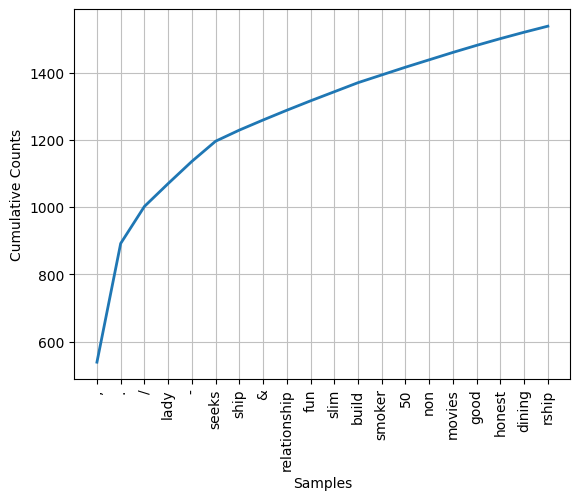

In [43]:
frequency_distribution.plot(20, cumulative=True)

we can analyze that, people writing person ads seem interested in honesty and 'lady'. they also used words like 'relationship', 'slim', 'smoker' quite a bit.
Next lets look at Collocations!

<h1> Collocations </h1>

a collocation is a sequence of words that shows up very often. some examples are:
* Syntax Tree
* Family Tree
* Decision Tree

To see a pair of words that come up often in a corpus, we call .collocations() function.

In [44]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


'slim build' and 'medium build' showed up with other combinations. <br>
I wonder what happens if we looked for collocations after lemmatizing the words in our corpus? would we get some different result? lets try it out. <br>
but, we can't call collocations() directly on any data types, so we need to do some preprocessing. lets create a lemetized words for all words in text8.

In [45]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in text8]

for us to be able to do lingustic processing task, we need to make NTLK text with this list,

In [46]:
new_text = nltk.Text(lemmatized_words)
new_text.collocations()

medium build; social drinker; non smoker; quiet night; long term;
would like; age open; easy going; financially secure; Would like; fun
time; similar interest; Age open; poss rship; weekend away; well
presented; never married; single mum; permanent relationship; year old


we can see that, this new collocations is missing <i>'weekends away'</i> and <i>'poss rship'</i>. <br>
<i>'year old'</i> and <i>'photo pls'</i> is new addition in lemmantized version. <br>
This is how we can look for common word combinations to see what people are talking about and how they are talking about it!